In [1]:
import pandas as pd
import missingno as msno
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score 
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
df = pd.read_csv('data/vehicles_dataset.csv')
print(df.shape)
df.head()

(10000, 20)


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


**Data description:**

- `id`: entry ID;
- `url`: sales record URL;
- `region`: region;
- `region_url`: URL region;
- `price`: car price;
- `year`: release year;
- `manufacturer`: car manufacturer;
- `model`: car model;
- `fuel`: type of fuel;
- `odometer`: count of miles traveled;
- `title_status`: status;
- `transmission`: type of transmission;
- `image_url`: URL car image;
- `description`: vehicle description;
- `state`: state of the USA;
- `lat`: latitude;
- `long`: longitude;
- `posting_date`: announcement date of the sale;
- `price_category`: car price category;
- `date`: announcement date of the sale in date format.

# Data Preparation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   url             10000 non-null  object 
 2   region          10000 non-null  object 
 3   region_url      10000 non-null  object 
 4   price           10000 non-null  int64  
 5   year            9964 non-null   float64
 6   manufacturer    10000 non-null  object 
 7   model           9872 non-null   object 
 8   fuel            9937 non-null   object 
 9   odometer        10000 non-null  int64  
 10  title_status    9834 non-null   object 
 11  transmission    9955 non-null   object 
 12  image_url       9998 non-null   object 
 13  description     9998 non-null   object 
 14  state           10000 non-null  object 
 15  lat             9902 non-null   float64
 16  long            9902 non-null   float64
 17  posting_date    9998 non-null   

## Data cleaning

### Check for duplicates

In [4]:
df[df.duplicated()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date


### Check for NaN

<AxesSubplot:>

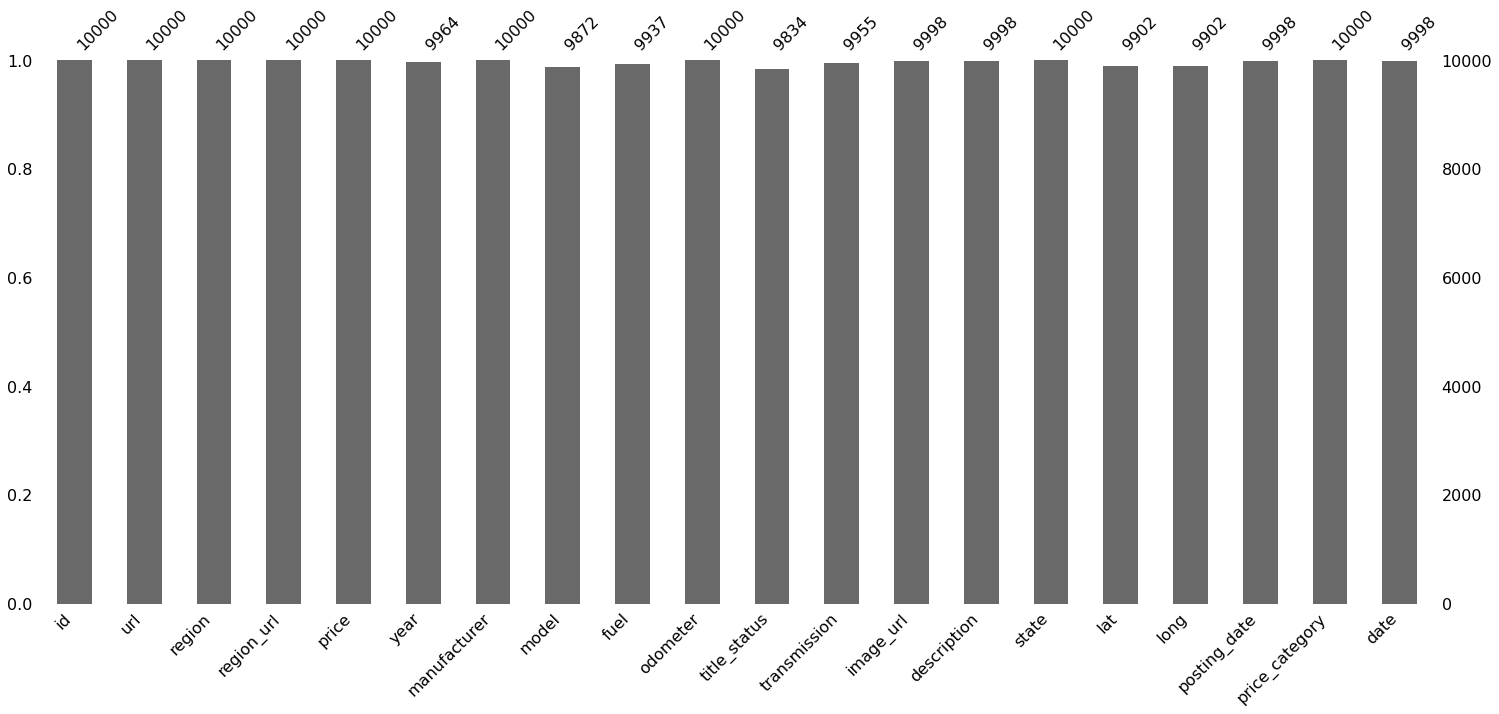

In [5]:
msno.bar(df)

In [6]:
def print_useful_rows_info(df):
    print(
        f'Count of fully filled objects from the entire sample: {len(df.dropna())} \n'
        f'Percentage of fully filled objects from the entire sample: {round(len(df.dropna()) / len(df) * 100, 2)}'
        )
    
print_useful_rows_info(df)

Count of fully filled objects from the entire sample: 9507 
Percentage of fully filled objects from the entire sample: 95.07


In [7]:
missing_values = (df.isna().sum() / len(df) * 100).sort_values(ascending=False)
missing_values

title_status      1.66
model             1.28
long              0.98
lat               0.98
fuel              0.63
transmission      0.45
year              0.36
posting_date      0.02
description       0.02
image_url         0.02
date              0.02
url               0.00
odometer          0.00
manufacturer      0.00
state             0.00
price             0.00
region_url        0.00
region            0.00
price_category    0.00
id                0.00
dtype: float64

In [8]:
df_clean = df.copy()

#### Handling NaN in a  column: "title_status"

In [9]:
print('Total values:', df_clean.title_status.value_counts(dropna=False).sum())
df_clean.title_status.value_counts(dropna=False)

Total values: 10000


clean         9518
rebuilt        171
NaN            166
salvage         92
lien            35
missing         16
parts only       2
Name: title_status, dtype: int64

In [10]:
df_clean[df_clean.title_status.isna()].head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
11,7316540706,https://cincinnati.craigslist.org/ctd/d/fairfi...,cincinnati,https://cincinnati.craigslist.org,4995,2012.0,fiat,500 pop,gas,59242,NaN,manual,https://images.craigslist.org/00Z0Z_jbUmVcYlwR...,"2012 Fiat 500 Pop FOR ONLY $102/mo!59,242 mi. ...",oh,39.297045,-84.563243,2021-05-03T21:03:32-0400,low,2021-05-04 01:03:32+00:00
187,7313570594,https://orangecounty.craigslist.org/ctd/d/coro...,orange county,https://orangecounty.craigslist.org,17900,2013.0,ram,1500 tradesman quad cab,gas,145499,NaN,automatic,https://images.craigslist.org/00H0H_1JFMPCYyW8...,2013 Ram 1500 Tradesman Quad Cab PRICED TO SEL...,ca,33.873436,-117.542806,2021-04-27T15:03:47-0700,medium,2021-04-27 22:03:47+00:00
245,7315211652,https://ocala.craigslist.org/ctd/d/riverview-2...,ocala,https://ocala.craigslist.org,40990,2019.0,toyota,sienna xle,gas,3700,NaN,automatic,https://images.craigslist.org/01111_grKNF8GrXz...,2019 Toyota Sienna - Wheelchair Accessible Han...,fl,27.849760,-82.364950,2021-05-01T06:35:56-0400,high,2021-05-01 10:35:56+00:00
286,7306702976,https://toledo.craigslist.org/ctd/d/chelsea-73...,toledo,https://toledo.craigslist.org,4592,2003.0,chevrolet,avalanche 1500,gas,268691,NaN,automatic,https://images.craigslist.org/00808_1IOMJuA4GL...,$73/mo - 2003 Chevrolet Avalanche 1500 BaseCre...,oh,42.300673,-84.024108,2021-04-14T12:03:01-0400,low,2021-04-14 16:03:01+00:00
312,7307609203,https://roseburg.craigslist.org/ctd/d/eugene-2...,roseburg,https://roseburg.craigslist.org,18450,2017.0,ford,mustang,gas,66049,NaN,automatic,https://images.craigslist.org/00505_4apF36sLbP...,"2017 Ford MUSTANG - $18,450 \tMayberry Motors ...",or,44.058499,-123.106176,2021-04-16T04:06:29-0700,medium,2021-04-16 11:06:29+00:00


In [11]:
df_clean.title_status = df_clean.title_status.fillna(df_clean.title_status.mode()[0])

In [12]:
print("Count of missing values in title_status:", df_clean.title_status.isna().sum())

Count of missing values in title_status: 0


#### Handling NaN in a  column: "model" 

In [13]:
print('Total values:', df_clean.model.value_counts(dropna=False).sum())
df_clean.model.value_counts(dropna=False)

Total values: 10000


f-150                        151
NaN                          128
silverado 1500               110
1500                         100
camry                         77
                            ... 
grand caravan sport            1
Nascar                         1
titan le                       1
sorrento lx v6                 1
a3 2.0t premium plus pzev      1
Name: model, Length: 3467, dtype: int64

In [14]:
df_clean.model.describe()

count      9872
unique     3466
top       f-150
freq        151
Name: model, dtype: object

In [15]:
df_clean[df_clean.model.isna()].head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
67,7316913641,https://ventura.craigslist.org/cto/d/camarillo...,ventura county,https://ventura.craigslist.org,3000,2005.0,rover,NaN,gas,165206,clean,automatic,https://images.craigslist.org/00S0S_b3yx6L4N2S...,2005 Range Rover HSE Changed Oil and now engi...,ca,34.219565,-119.001986,2021-05-04T13:11:15-0700,low,2021-05-04 20:11:15+00:00
142,7316550853,https://chicago.craigslist.org/chc/cto/d/midlo...,chicago,https://chicago.craigslist.org,3000,2006.0,jeep,NaN,gas,132000,clean,automatic,https://images.craigslist.org/01111_kNv3EKjH4H...,SUPER CLEAN 2006 JEEP LIBEERY RANAGADE 4X4 O...,il,41.618957,-87.726334,2021-05-03T20:33:40-0500,low,2021-05-04 01:33:40+00:00
151,7303575863,https://worcester.craigslist.org/ctd/d/fitchbu...,worcester / central MA,https://worcester.craigslist.org,7800,2007.0,gmc,NaN,gas,190000,clean,automatic,https://images.craigslist.org/00f0f_iWjiToqea2...,2007 gmc with plow leather loaded nice truck r...,ma,42.579600,-71.803100,2021-04-08T09:10:07-0400,low,2021-04-08 13:10:07+00:00
200,7315267860,https://gainesville.craigslist.org/ctd/d/kissi...,gainesville,https://gainesville.craigslist.org,19200,2012.0,ram,NaN,gas,121371,clean,automatic,https://images.craigslist.org/00W0W_hHV4D0Po0G...,2012 RAM 1500 Laramie Crew Cab 2WD Offered...,fl,28.329026,-81.404237,2021-05-01T10:05:17-0400,medium,2021-05-01 14:05:17+00:00
251,7316024407,https://reading.craigslist.org/ctd/d/paterson-...,reading,https://reading.craigslist.org,18695,2007.0,ram,NaN,diesel,220019,clean,automatic,https://images.craigslist.org/00n0n_jgq4eOvH7I...,2007 Dodge Ram 2500 SLT 4x4 Quad Cab Cummins D...,pa,40.894535,-74.152367,2021-05-02T21:06:09-0400,medium,2021-05-03 01:06:09+00:00


In [16]:
df_clean.model = df_clean.model.fillna('other')

In [17]:
print("Count of missing values in model:", df_clean.model.isna().sum())

Count of missing values in model: 0


#### Handling NaN in columns: "long" and "lat"

In [18]:
print('Total values:', df_clean.long.value_counts(dropna=False).sum())
df_clean.long.value_counts(dropna=False)

Total values: 10000


 NaN          98
-84.112200    88
-84.411811    79
-74.281707    73
-84.445400    54
              ..
-82.527995     1
-97.031100     1
-85.806306     1
-78.625588     1
-79.189500     1
Name: long, Length: 5083, dtype: int64

In [19]:
df_clean.long.describe()

count    9902.000000
mean      -94.165877
std        18.128504
min      -158.069300
25%      -110.322086
50%       -88.000050
75%       -80.830000
max       173.885502
Name: long, dtype: float64

In [20]:
df_clean.lat.describe()

count    9902.000000
mean       38.594142
std         5.844895
min       -67.144243
25%        34.830368
50%        39.298522
75%        42.428070
max        64.947500
Name: lat, dtype: float64

In [21]:
df_clean[df_clean.long.isna()].head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
118,7312692841,https://tricities.craigslist.org/ctd/d/bmw-ser...,tri-cities,https://tricities.craigslist.org,17998,2012.0,bmw,5 series,gas,62665,clean,automatic,https://images.craigslist.org/00909_57Xyuj8AJH...,2012 BMW 5 Series 535i M Sport Heat & Cool Sea...,tn,NaN,NaN,2021-04-26T04:28:35-0400,medium,2021-04-26 08:28:35+00:00
126,7315526339,https://newjersey.craigslist.org/ctd/d/look-wh...,north jersey,https://newjersey.craigslist.org,22995,2014.0,bmw,7 series,gas,81085,clean,automatic,https://images.craigslist.org/00k0k_38TNTakyUf...,2014 BMW 7 Series 4dr Sdn 750Li xDrive AWD Aut...,nj,NaN,NaN,2021-05-01T17:49:09-0400,high,2021-05-01 21:49:09+00:00
502,7308641593,https://winstonsalem.craigslist.org/ctd/d/ford...,winston-salem,https://winstonsalem.craigslist.org,20998,2016.0,ford,transit cargo,gas,123825,clean,automatic,https://images.craigslist.org/00101_gwJT4WBNRo...,2016 Ford Transit Cargo Vans Work Van High Roo...,nc,NaN,NaN,2021-04-18T04:43:46-0400,medium,2021-04-18 08:43:46+00:00
567,7309282242,https://onslow.craigslist.org/ctd/d/mercedes-b...,jacksonville,https://onslow.craigslist.org,10810,2014.0,mercedes-benz,c-class,gas,124476,clean,automatic,https://images.craigslist.org/01414_6jNHxQwrKx...,2014 Mercedes Benz C Class C 250 Sport Coupe C...,nc,NaN,NaN,2021-04-19T12:06:28-0400,medium,2021-04-19 16:06:28+00:00
692,7314847134,https://atlanta.craigslist.org/atl/ctd/d/2008-...,atlanta,https://atlanta.craigslist.org,17900,2008.0,toyota,tundra,gas,96000,clean,automatic,https://images.craigslist.org/01313_6u7l4KgvV4...,Description: 2008 Toyota Tundra 5...,ga,NaN,NaN,2021-04-30T12:09:49-0400,medium,2021-04-30 16:09:49+00:00


In [22]:
df_clean[df_clean.long.isna()].id.tolist() == df_clean[df_clean.lat.isna()].id.tolist()

True

In [23]:
df_clean.long = df_clean.long.fillna(df_clean.long.mean())
df_clean.lat = df_clean.lat.fillna(df_clean.lat.mean())

In [24]:
print(
    f'Count of missing values in long: {df_clean.long.isna().sum()}\n'
    f'Count of missing values in lat: {df_clean.lat.isna().sum()}'
    )

Count of missing values in long: 0
Count of missing values in lat: 0


#### Handling NaN in a column: "fuel"

In [25]:
print('Total values:', df_clean.fuel.value_counts(dropna=False).sum())
df_clean.fuel.value_counts(dropna=False)

Total values: 10000


gas         8402
other        730
diesel       653
hybrid       108
NaN           63
electric      44
Name: fuel, dtype: int64

In [26]:
df_clean[df_clean.fuel.isna()].head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
32,7309910590,https://eugene.craigslist.org/ctd/d/eugene-200...,eugene,https://eugene.craigslist.org,4977,2001.0,toyota,camry solara 2dr cpe se v6 auto (natl),NaN,193242,clean,automatic,https://images.craigslist.org/00F0F_ebtJlxCQjv...,***Call Us for more information at: 541-228-94...,or,44.076513,-123.150156,2021-04-20T10:40:15-0700,low,2021-04-20 17:40:15+00:00
78,7314559074,https://eugene.craigslist.org/ctd/d/eugene-200...,eugene,https://eugene.craigslist.org,27977,2009.0,ford,"f-150 4wd supercrew 145"" platinum",NaN,79522,clean,automatic,https://images.craigslist.org/00L0L_khoMmqXaSJ...,***Call Us for more information at: 541-228-94...,or,44.076513,-123.150156,2021-04-29T15:15:30-0700,high,2021-04-29 22:15:30+00:00
275,7315141987,https://honolulu.craigslist.org/oah/ctd/d/fort...,hawaii,https://honolulu.craigslist.org,29888,2019.0,nissan,frontier crew cab 4x2 sv auto,NaN,10679,clean,automatic,https://images.craigslist.org/00F0F_d9wEXQuSyu...,***Call Us for more information at: 877-262-34...,hi,21.344376,-157.896975,2021-04-30T15:50:19-1000,high,2021-05-01 01:50:19+00:00
425,7315662117,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,43900,NaN,other,Grand Caravan,NaN,21,clean,automatic,https://images.craigslist.org/00f0f_7AwipNocNH...,"2019 *Dodge* *Grand Caravan* SE - $43,900Call ...",co,39.674406,-104.998604,2021-05-02T01:11:33-0600,high,2021-05-02 07:11:33+00:00


In [27]:
df_clean.fuel = df_clean.fuel.fillna('other')

In [28]:
print("Count of missing values in fuel:", df_clean.fuel.isna().sum())

Count of missing values in fuel: 0


#### Handling NaN in a column: "transmission"

In [29]:
print('Total values:', df_clean.transmission.value_counts(dropna=False).sum())
df_clean.transmission.value_counts(dropna=False)

Total values: 10000


automatic    7700
other        1624
manual        631
NaN            45
Name: transmission, dtype: int64

In [30]:
df_clean[df_clean.transmission.isna()].head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
111,7305109580,https://grandrapids.craigslist.org/ctd/d/comst...,grand rapids,https://grandrapids.craigslist.org,12750,2013.0,lexus,es,gas,109382,clean,NaN,https://images.craigslist.org/00n0n_kACT1l7OCN...,2013 Lexus ES 350 4dr Sdn Offered by: Auto...,mi,43.059210,-85.688970,2021-04-11T09:41:58-0400,medium,2021-04-11 13:41:58+00:00
112,7314951119,https://southjersey.craigslist.org/ctd/d/chest...,south jersey,https://southjersey.craigslist.org,18199,2012.0,jeep,wrangler,other,130174,clean,NaN,https://images.craigslist.org/00I0I_gRmuXmqil1...,2012 Jeep Wrangler Unlimited Sport 4WD Off...,nj,40.135190,-74.703570,2021-04-30T14:58:56-0400,medium,2021-04-30 18:58:56+00:00
817,7308021604,https://southjersey.craigslist.org/ctd/d/maple...,south jersey,https://southjersey.craigslist.org,11999,2015.0,honda,civic,gas,79797,clean,NaN,https://images.craigslist.org/00b0b_aCqgRZ7sAx...,2015 Honda Civic EX Offered by: VIP Auto O...,nj,39.938023,-74.971461,2021-04-16T19:46:55-0400,medium,2021-04-16 23:46:55+00:00
931,7314781483,https://nh.craigslist.org/ctd/d/plaistow-2018-...,new hampshire,https://nh.craigslist.org,64990,2018.0,ram,3500,other,8853,clean,NaN,https://images.craigslist.org/00000_iHpXs2BVmN...,2018 RAM Ram Chassis 3500 Short Wheelbase (Dua...,nh,42.834977,-71.107791,2021-04-30T10:15:30-0400,high,2021-04-30 14:15:30+00:00
970,7315044723,https://poconos.craigslist.org/ctd/d/chesterfi...,poconos,https://poconos.craigslist.org,22699,2014.0,jeep,wrangler,gas,110493,clean,NaN,https://images.craigslist.org/00M0M_aFDXWIfug9...,2014 Jeep Wrangler Unlimited Sport 4WD Off...,pa,40.135190,-74.703570,2021-04-30T17:46:04-0400,high,2021-04-30 21:46:04+00:00


In [31]:
df_clean.transmission = df_clean.transmission.fillna('other')

In [32]:
print("Count of missing values in transmission:", df_clean.transmission.isna().sum())

Count of missing values in transmission: 0


#### Handling NaN in columns: "year", "posting_date", "description", "image_url"  and "date"

In [33]:
print('Total values:', df_clean.year.value_counts(dropna=False).sum())
df_clean.year.value_counts(dropna=False)

Total values: 10000


2018.0    810
2017.0    809
2016.0    745
2013.0    699
2015.0    668
         ... 
1927.0      1
1958.0      1
1941.0      1
1935.0      1
1954.0      1
Name: year, Length: 90, dtype: int64

In [34]:
df_clean.year.isna().sum()

36

In [35]:
df_clean[df_clean.year.isna()].head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
344,7304102133,https://wenatchee.craigslist.org/ctd/d/wenatch...,wenatchee,https://wenatchee.craigslist.org,35880,NaN,other,500,gas,13508,clean,automatic,https://images.craigslist.org/00J0J_6IMoEUzIIM...,2019 *Ram* *1500* Big Horn/Lone Star 4x2 Quad ...,wa,47.434493,-120.320759,2021-04-09T06:31:03-0700,high,2021-04-09 13:31:03+00:00
420,7316337069,https://lasvegas.craigslist.org/ctd/d/scottsda...,las vegas,https://lasvegas.craigslist.org,84995,NaN,other,Super Duty F-350 SRW,diesel,1268,clean,automatic,https://images.craigslist.org/00x0x_iQCC0Ef28S...,2020 *Ford* *Super Duty F-350 SRW* 1K MILES. B...,nv,33.458277,-111.925970,2021-05-03T11:31:39-0700,high,2021-05-03 18:31:39+00:00
425,7315662117,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,43900,NaN,other,Grand Caravan,other,21,clean,automatic,https://images.craigslist.org/00f0f_7AwipNocNH...,"2019 *Dodge* *Grand Caravan* SE - $43,900Call ...",co,39.674406,-104.998604,2021-05-02T01:11:33-0600,high,2021-05-02 07:11:33+00:00
702,7316199009,https://nashville.craigslist.org/ctd/d/nashvil...,nashville,https://nashville.craigslist.org,28498,NaN,other,olet Silverado 1500,other,59246,clean,automatic,https://images.craigslist.org/00T0T_dZ7nOXskCS...,2019 *Chevrolet* *Silverado 1500* 2019 CHEVROL...,tn,36.138022,-86.732261,2021-05-03T10:00:40-0500,high,2021-05-03 15:00:40+00:00
893,7316840794,https://denver.craigslist.org/ctd/d/american-f...,denver,https://denver.craigslist.org,60900,NaN,other,F-150,gas,6110,clean,automatic,https://images.craigslist.org/01616_bpzSdSRTbx...,"2020 *Ford* *F-150* PLATINUM FX4 Truck - $60,9...",co,40.362248,-111.785947,2021-05-04T12:11:22-0600,high,2021-05-04 18:11:22+00:00


In [36]:
df_clean[df_clean.year.isna()].description.str[0:4]

344     2019
420     2020
425     2019
702     2019
893     2020
906     2020
1005    2019
1217    2019
1319    2018
1845    2020
2292    2019
2504    2019
2629    Chev
2819    2019
2959    2018
3294    2018
3509    2020
3521    2020
3671    2019
4220    2020
6120    2018
6196    2020
6323    2020
6728     NaN
7200    2018
7652    2021
7815    2019
7819    2019
8527    2020
8805    2019
9330    2019
9388     NaN
9549    2020
9723    2019
9849    2019
9953    2020
Name: description, dtype: object

In [37]:
df_clean[df_clean.year.isna()].url.str.split('-').str[1]

344          2019
420          2020
425          2019
702          2019
893          fork
906          2020
1005         2019
1217         2019
1319         2018
1845       smyrna
2292       castle
2504         2019
2629    chevrolet
2819       bluffs
2959         2018
3294         2018
3509         2020
3521         2020
3671         2019
4220         2020
6120         2018
6196         2020
6323       castle
6728         2012
7200         2018
7652         2021
7815         2019
7819         2019
8527         2020
8805         2019
9330         2019
9388         2011
9549         2020
9723         2019
9849         2019
9953         2020
Name: url, dtype: object

In [38]:
df_clean.loc[[2629, 6728, 9388], :]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
2629,7314588156,https://inlandempire.craigslist.org/ctd/d/hesp...,inland empire,https://inlandempire.craigslist.org,2599,NaN,other,olet Impala,other,1,clean,other,https://images.craigslist.org/00P0P_dKsEWbujM0...,Chevrolet Impala * AUCTION PRICES TO THE PUBL...,ca,34.451930,-117.287060,2021-04-29T16:19:54-0700,low,2021-04-29 23:19:54+00:00
6728,7315259025,https://nh.craigslist.org/cto/d/manchester-201...,new hampshire,https://nh.craigslist.org,3750,NaN,other,other,other,95674,clean,other,NaN,NaN,nh,38.594142,-94.165877,NaN,low,NaN
9388,7208549803,https://bellingham.craigslist.org/ctd/d/bellin...,bellingham,https://bellingham.craigslist.org,11999,NaN,other,other,other,95674,clean,other,NaN,NaN,wa,38.594142,-94.165877,NaN,medium,NaN


In [39]:
# In row 2629 information about the year of issue is missing, and in rows 6728 and 9388 have a lot of blank information,
# therefore:
df_clean = df_clean.drop(labels=[2629, 6728, 9388], axis=0)
df_clean.shape

(9997, 20)

In [40]:
df_clean.year = df_clean.year.fillna(df.description.str[0:4])

In [41]:
print(
    f'Count of missing values in year: {df_clean.year.isna().sum()}\n'
    f'Count of missing values in posting_date: {df_clean.posting_date.isna().sum()}\n'
    f'Count of missing values in description: {df_clean.description.isna().sum()}\n'
    f'Count of missing values in image_url: {df_clean.image_url.isna().sum()}\n'
    f'Count of missing values in date: {df_clean.date.isna().sum()}'
    )

Count of missing values in year: 0
Count of missing values in posting_date: 0
Count of missing values in description: 0
Count of missing values in image_url: 0
Count of missing values in date: 0


In [42]:
print_useful_rows_info(df_clean)

Count of fully filled objects from the entire sample: 9997 
Percentage of fully filled objects from the entire sample: 100.0


### Saving to a file

In [44]:
df_clean.to_csv('data/df_clean.csv', index=False)

## Data transformation

In [45]:
df_clean.dtypes

id                  int64
url                object
region             object
region_url         object
price               int64
year               object
manufacturer       object
model              object
fuel               object
odometer            int64
title_status       object
transmission       object
image_url          object
description        object
state              object
lat               float64
long              float64
posting_date       object
price_category     object
date               object
dtype: object

In [46]:
df_types = df_clean.copy()

### Transformation of quantitative data

In [47]:
df_types.year = df_types.year.astype(int)
df_types.year.dtype

dtype('int32')

### Transformation of qualitative data 

In [48]:
df_types.date = pd.to_datetime(df_types.date)
df_types.date

0      2021-04-17 16:30:50+00:00
1      2021-05-03 19:40:21+00:00
2      2021-04-28 10:52:20+00:00
3      2021-04-17 14:08:57+00:00
4      2021-05-03 22:32:06+00:00
                  ...           
9995   2021-04-10 20:33:57+00:00
9996   2021-05-03 13:36:30+00:00
9997   2021-04-22 19:14:01+00:00
9998   2021-04-14 14:14:42+00:00
9999   2021-04-24 17:50:49+00:00
Name: date, Length: 9997, dtype: datetime64[ns, UTC]

In [49]:
df_types.fuel = df_types.fuel.astype('category')
df_types.fuel.dtype

CategoricalDtype(categories=['diesel', 'electric', 'gas', 'hybrid', 'other'], ordered=False)

In [50]:
df_types.title_status = df_types.title_status.astype('category')
df_types.title_status.dtype

CategoricalDtype(categories=['clean', 'lien', 'missing', 'parts only', 'rebuilt',
                  'salvage'],
, ordered=False)

In [51]:
df_types.transmission = df_types.transmission.astype('category')
df_types.transmission.dtype

CategoricalDtype(categories=['automatic', 'manual', 'other'], ordered=False)

In [52]:
df_types.price_category = df_types.price_category.astype('category')
df_types.price_category.dtype

CategoricalDtype(categories=['high', 'low', 'medium'], ordered=False)

### Saving to a file

In [53]:
df_types.to_csv('data/df_types.csv', index=False)

## Check for anomalies and outliers

In [54]:
df_types.describe()

,id,price,year,odometer,lat,long
count,9.997000e+03,9.997000e+03,9997.000000,9997.000000,9997.000000,9997.000000
mean,7.311551e+09,2.068279e+04,2010.955487,93332.999000,38.594556,-94.163565
std,4.357963e+06,1.246414e+05,9.668015,63183.751534,5.816907,18.040671
min,7.301586e+09,5.000000e+02,1915.000000,0.000000,-67.144243,-158.069300
25%,7.308189e+09,7.900000e+03,2008.000000,39149.000000,34.920000,-108.553946
50%,7.312757e+09,1.576300e+04,2013.000000,89000.000000,39.205558,-88.219600
75%,7.315275e+09,2.799000e+04,2017.000000,136875.000000,42.382900,-80.998136
max,7.317090e+09,1.234568e+07,2022.000000,283466.000000,64.947500,173.885502


In [55]:
df_out = df_types.copy()

In [56]:
def get_out_boundaries(column):
    q25 = df_out[column].quantile(0.25)
    q75 = df_out[column].quantile(0.75)
    boundaries = (q25 - 1.5*(q75 - q25), q75 + 1.5*(q75 - q25))
    is_outlier = (df_out[column] < boundaries[0]) | (df_out[column] > boundaries[1])
    return boundaries, is_outlier

### Check for anomalies and outliers in a column: "price"

In [57]:
df_out.price.describe().apply(lambda x: f"{x:0.3f}")

count        9997.000
mean        20682.785
std        124641.443
min           500.000
25%          7900.000
50%         15763.000
75%         27990.000
max      12345678.000
Name: price, dtype: object

In [58]:
boundaries_price, is_outlier_price = get_out_boundaries('price')
boundaries_price

(-22235.0, 58125.0)

In [59]:
df_out[is_outlier_price]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
21,7312327909,https://madison.craigslist.org/cto/d/madison-1...,madison,https://madison.craigslist.org,89995,1970,other,oldsmobile 442,gas,111111,clean,automatic,https://images.craigslist.org/00S0S_agk7Nol4CO...,1970 Oldsmobile 442 Convertible 442 Indy Pace ...,wi,43.098400,-89.273400,2021-04-25T10:10:43-0500,high,2021-04-25 15:10:43+00:00
33,7304521734,https://kpr.craigslist.org/ctd/d/pasco-2019-fo...,kennewick-pasco-richland,https://kpr.craigslist.org,79999,2019,ford,f450 deisel power stroke,diesel,41759,clean,automatic,https://images.craigslist.org/00D0D_ctOGGthFxQ...,2019 Ford F450 Lariat FX4 Dually 4x4 **Clean C...,wa,46.234838,-119.128015,2021-04-09T19:46:04-0700,high,2021-04-10 02:46:04+00:00
57,7314413105,https://inlandempire.craigslist.org/ctd/d/cost...,inland empire,https://inlandempire.craigslist.org,69888,1948,ford,coe,gas,1,clean,automatic,https://images.craigslist.org/00M0M_8jgBCZZuG6...,Awesome Resto-Mod COE Ford Car Hauler. Equippe...,ca,33.680100,-117.908500,2021-04-29T10:49:29-0700,high,2021-04-29 17:49:29+00:00
96,7311450619,https://wenatchee.craigslist.org/ctd/d/kittita...,wenatchee,https://wenatchee.craigslist.org,58995,2020,jeep,wrangler,gas,17799,clean,automatic,https://images.craigslist.org/00a0a_chVstv8e4Z...,ＷＩＮＤＹ ＣＨＥＶＲＯＬＥＴ ⭐ No Payments For 90 Days* ⭐...,wa,46.999600,-120.516300,2021-04-23T10:43:27-0700,high,2021-04-23 17:43:27+00:00
144,7305640478,https://siouxfalls.craigslist.org/ctd/d/gilber...,sioux falls / SE SD,https://siouxfalls.craigslist.org,59900,2014,ford,f550 xl,diesel,156000,clean,automatic,https://images.craigslist.org/00x0x_httQ0BwNkq...,**FOR SALE** 2014 Ford F550 Super Duty 45' Al...,sd,42.117274,-88.436783,2021-04-12T10:34:12-0500,high,2021-04-12 15:34:12+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9926,7316447901,https://tulsa.craigslist.org/cto/d/tulsa-2017-...,tulsa,https://tulsa.craigslist.org,65000,2017,rover,other,gas,47000,clean,automatic,https://images.craigslist.org/00s0s_iGpmplDL99...,"2017 Range Rover HSE, supercharged V8, silver ...",ok,36.126200,-95.940800,2021-05-03T16:37:36-0500,high,2021-05-03 21:37:36+00:00
9955,7315493686,https://palmsprings.craigslist.org/ctd/d/fonta...,palm springs,https://palmsprings.craigslist.org,68995,2016,ram,2500,diesel,61130,clean,automatic,https://images.craigslist.org/00p0p_5PdfAkd0AM...,2016 Ram 2500 Laramie Offered by: R&B Auto...,ca,34.107220,-117.455310,2021-05-01T13:40:57-0700,high,2021-05-01 20:40:57+00:00
9971,7314385254,https://spokane.craigslist.org/ctd/d/puyallup-...,spokane / coeur d'alene,https://spokane.craigslist.org,86977,2017,ford,f450 super duty crew cab,diesel,16806,clean,automatic,https://images.craigslist.org/00H0H_5P0NdUIgHi...,2017 *** Ford F450 Super Duty Crew Cab Platinu...,id,47.197304,-122.291776,2021-04-29T10:03:19-0700,high,2021-04-29 17:03:19+00:00
9978,7307184389,https://holland.craigslist.org/ctd/d/otsego-20...,holland,https://holland.craigslist.org,61022,2020,gmc,sierra 1500,gas,5894,clean,automatic,https://images.craigslist.org/00i0i_64FIhCkyTb...,"2020 GMC Sierra 1500 AT4 -- $61,022 ☎ Call ...",mi,42.448987,-85.661948,2021-04-15T11:05:47-0400,high,2021-04-15 15:05:47+00:00


In [60]:
df_out.loc[is_outlier_price, 'price'] = boundaries_price[1]

In [61]:
df_out.price.describe().apply(lambda x: f"{x:0.3f}")

count     9997.000
mean     18971.872
std      13695.895
min        500.000
25%       7900.000
50%      15763.000
75%      27990.000
max      58125.000
Name: price, dtype: object

### Check for anomalies and outliers in a column: "year"

In [62]:
df_out.year.describe()

count    9997.000000
mean     2010.955487
std         9.668015
min      1915.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

In [63]:
boundaries_year, is_outlier_year = get_out_boundaries('year')
boundaries_year

(1994.5, 2030.5)

In [64]:
df_out[is_outlier_year]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
13,7317089086,https://seattle.craigslist.org/see/ctd/d/portl...,seattle-tacoma,https://seattle.craigslist.org,14995,1994,ford,e-series van universal by glaval designer luxu...,gas,156925,clean,automatic,https://images.craigslist.org/00r0r_13JUlXZOMl...,"Priced to Sell: $14,9951994 Ford E-Series Van ...",wa,45.391373,-122.613533,2021-05-04T20:22:11-0700,medium,2021-05-05 03:22:11+00:00
21,7312327909,https://madison.craigslist.org/cto/d/madison-1...,madison,https://madison.craigslist.org,58125,1970,other,oldsmobile 442,gas,111111,clean,automatic,https://images.craigslist.org/00S0S_agk7Nol4CO...,1970 Oldsmobile 442 Convertible 442 Indy Pace ...,wi,43.098400,-89.273400,2021-04-25T10:10:43-0500,high,2021-04-25 15:10:43+00:00
57,7314413105,https://inlandempire.craigslist.org/ctd/d/cost...,inland empire,https://inlandempire.craigslist.org,58125,1948,ford,coe,gas,1,clean,automatic,https://images.craigslist.org/00M0M_8jgBCZZuG6...,Awesome Resto-Mod COE Ford Car Hauler. Equippe...,ca,33.680100,-117.908500,2021-04-29T10:49:29-0700,high,2021-04-29 17:49:29+00:00
66,7310077530,https://hudsonvalley.craigslist.org/cto/d/bloo...,hudson valley,https://hudsonvalley.craigslist.org,5500,1990,other,Diahatsu,gas,30000,clean,manual,https://images.craigslist.org/00T0T_a4VRbx40ea...,1991 Daihatsu hijet 5 speed extended cab....im...,ny,41.564400,-74.430400,2021-04-20T18:30:18-0400,low,2021-04-20 22:30:18+00:00
106,7314527175,https://rapidcity.craigslist.org/ctd/d/sherman...,rapid city / west SD,https://rapidcity.craigslist.org,43500,1968,chevrolet,camaro,gas,43320,clean,manual,https://images.craigslist.org/00h0h_2N66LMJBAI...,1968 Chevrolet Camaro Convertible. VIN:124678N...,sd,33.637200,-96.618400,2021-04-29T15:11:01-0600,high,2021-04-29 21:11:01+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9886,7313487583,https://springfield.craigslist.org/cto/d/mount...,springfield,https://springfield.craigslist.org,3500,1974,jeep,cj5,gas,10000,clean,manual,https://images.craigslist.org/00G0G_cdxzaTaVqa...,1974 Jeep cj5 304 v8 4speed manual trans Da...,mo,36.331200,-92.375300,2021-04-27T14:30:28-0500,low,2021-04-27 19:30:28+00:00
9921,7311566144,https://chico.craigslist.org/cto/d/chico-1994-...,chico,https://chico.craigslist.org,16000,1994,ford,f250,gas,32500,clean,automatic,https://images.craigslist.org/01010_343KkgTaHo...,"Up for sale is this 32,000 original mile Ford ...",ca,39.745800,-121.844400,2021-04-23T13:51:20-0700,medium,2021-04-23 20:51:20+00:00
9944,7313676859,https://reno.craigslist.org/ctd/d/sherman-1984...,reno / tahoe,https://reno.craigslist.org,26500,1984,chevrolet,silverado,gas,38751,clean,automatic,https://images.craigslist.org/00r0r_czXfi4UeJF...,"1984 Chevrolet C10 Silverado, short wheelbase ...",ca,33.637200,-96.618400,2021-04-27T19:44:27-0700,high,2021-04-28 02:44:27+00:00
9972,7316458200,https://portland.craigslist.org/mlt/cto/d/port...,portland,https://portland.craigslist.org,18500,1972,chevrolet,other,gas,75000,clean,automatic,https://images.craigslist.org/00x0x_7FqS8iHJst...,1972 classic Chevrolet pick up custom deluxe ...,or,45.494960,-122.666988,2021-05-03T14:58:34-0700,medium,2021-05-03 21:58:34+00:00


In [65]:
df_out.loc[is_outlier_year, 'year'] = int(boundaries_year[0]) + 1

In [66]:
df_out.year.describe()

count    9997.000000
mean     2011.733920
std         6.416065
min      1995.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

### Check for anomalies and outliers in a column: "odometer"

In [67]:
df_out.odometer.describe().apply(lambda x: f"{x:0.3f}")

count      9997.000
mean      93332.999
std       63183.752
min           0.000
25%       39149.000
50%       89000.000
75%      136875.000
max      283466.000
Name: odometer, dtype: object

In [68]:
boundaries_odometer, is_outlier_odometer = get_out_boundaries('odometer')
boundaries_odometer

(-107440.0, 283464.0)

In [69]:
df_out[is_outlier_odometer]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
27,7311516735,https://easttexas.craigslist.org/cto/d/lufkin-...,tyler / east TX,https://easttexas.craigslist.org,17000,2003,dodge,3500,diesel,283466,clean,automatic,https://images.craigslist.org/00Q0Q_8WsRzpw9LV...,2003 Dodge 3500 4x4 diesel dually. It has 307k...,tx,31.270000,-94.646900,2021-04-23T14:27:25-0500,medium,2021-04-23 19:27:25+00:00
114,7310943842,https://showlow.craigslist.org/ctd/d/pinetop-2...,show low,https://showlow.craigslist.org,2795,2004,mazda,tribute,gas,283466,clean,automatic,https://images.craigslist.org/00y0y_9hjvC3qkk3...,ACCUSHINE AUTO SALES 1827 E. WHITE MTN. BLVD. ...,az,34.117500,-109.919700,2021-04-22T10:52:07-0700,low,2021-04-22 17:52:07+00:00
385,7306101528,https://desmoines.craigslist.org/ctd/d/windom-...,des moines,https://desmoines.craigslist.org,58125,2013,other,CATERPILLAR CT660S,diesel,283466,clean,automatic,https://images.craigslist.org/00I0I_UkoGuDPqYZ...,LA MOTORSPORTS DIESELTRUCKSMN.COM 2013 CATERP...,ia,43.863689,-95.113792,2021-04-13T08:34:24-0500,high,2021-04-13 13:34:24+00:00
444,7304168190,https://elpaso.craigslist.org/ctd/d/las-cruces...,el paso,https://elpaso.craigslist.org,16999,2016,jeep,renegade,gas,283466,clean,automatic,https://images.craigslist.org/00Q0Q_ajHii9qB6e...,"‘16 Jeep Renegade Limited, auto, air, power wi...",tx,32.288990,-106.781616,2021-04-09T09:26:05-0600,medium,2021-04-09 15:26:05+00:00
552,7314722320,https://nh.craigslist.org/ctd/d/medford-2015-h...,new hampshire,https://nh.craigslist.org,26500,2015,other,HINO 268A,diesel,283466,clean,automatic,https://images.craigslist.org/01111_aEpkHS4iop...,"2015 HINO 268A 24' REFRIG NCDL 260 HP, ALLISIO...",nh,42.417300,-71.108700,2021-04-30T07:30:45-0400,high,2021-04-30 11:30:45+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9157,7314148003,https://kansascity.craigslist.org/cto/d/lees-s...,"kansas city, MO",https://kansascity.craigslist.org,2999,2010,chevrolet,hhr ls,gas,283466,clean,automatic,https://images.craigslist.org/00n0n_h4YYCjZeD9...,2010 CHEVY HHR LS --- POWER LOCKS/WINDOWS/MIRR...,ks,38.851800,-94.394400,2021-04-28T20:15:49-0500,low,2021-04-29 01:15:49+00:00
9275,7313696556,https://mcallen.craigslist.org/cto/d/mcallen-2...,mcallen / edinburg,https://mcallen.craigslist.org,4500,2003,chevrolet,avalanche,gas,283466,clean,automatic,https://images.craigslist.org/00m0m_ey8pcui9d1...,Vendo mi Chevrolet Avalanche 2003 que está en ...,tx,26.215400,-98.235900,2021-04-27T23:10:38-0500,low,2021-04-28 04:10:38+00:00
9389,7306697432,https://knoxville.craigslist.org/cto/d/knoxvil...,knoxville,https://knoxville.craigslist.org,3550,2012,nissan,nv2500,gas,283466,clean,automatic,https://images.craigslist.org/00404_guoJBc6u6o...,Good running and driving van,tn,35.991800,-83.849600,2021-04-14T11:54:41-0400,low,2021-04-14 15:54:41+00:00
9500,7311709925,https://greatfalls.craigslist.org/cto/d/havre-...,great falls,https://greatfalls.craigslist.org,7000,2005,chevrolet,silverado,gas,283466,clean,automatic,https://images.craigslist.org/00808_hX52l6571o...,"2005 Chevy 1500 LS, has 290k miles on it but h...",mt,48.542862,-109.695310,2021-04-23T20:41:47-0600,low,2021-04-24 02:41:47+00:00


In [70]:
df_out.loc[is_outlier_odometer, 'odometer'] = boundaries_odometer[1]

In [71]:
df_out.odometer.describe().apply(lambda x: f"{x:0.3f}")

count      9997.000
mean      93332.981
std       63183.697
min           0.000
25%       39149.000
50%       89000.000
75%      136875.000
max      283464.000
Name: odometer, dtype: object

### Saving to a file

In [72]:
df_out.to_csv('data/df_out.csv', index=False)

# Feature Engineering

In [74]:
df_new = df_out.copy()

## Creation of new columns

In [75]:
df_new.shape

(9997, 20)

In [76]:
df_new['short_model'] = df_new.model.apply(lambda x: x.lower().split()[0])
df_new.short_model

0           2500
1       explorer
2           golf
3           rav4
4         altima
          ...   
9995        rav4
9996    wrangler
9997          a3
9998     cayenne
9999        1500
Name: short_model, Length: 9997, dtype: object

In [77]:
df_new['region_corrected'] = df_new.apply(lambda x: x.region.lower().replace('  ', '').replace(' ', '').split('/')[0], axis=1)
df_new['region_corrected']

0        chattanooga
1        northjersey
2               reno
3       fayetteville
4        newyorkcity
            ...     
9995      chautauqua
9996      binghamton
9997           salem
9998         madison
9999         norfolk
Name: region_corrected, Length: 9997, dtype: object

In [78]:
df_new['desc_len'] = df_new.apply(lambda x: len(x.description), axis=1)
df_new['desc_len']

0       4482
1        968
2       4286
3       3241
4        538
        ... 
9995    1710
9996     948
9997     909
9998    3644
9999    4483
Name: desc_len, Length: 9997, dtype: int64

In [79]:
df_new['model_in_desc'] = df_new.apply(lambda x: x.description.lower().count(x.model.lower()), axis=1)
df_new['model_in_desc']

0       0
1       0
2       0
3       6
4       1
       ..
9995    0
9996    3
9997    2
9998    2
9999    0
Name: model_in_desc, Length: 9997, dtype: int64

In [80]:
def get_age_category(year):
    age_category = ''
    if year >= 2014:
        age_category = 'new'
    elif year < 2006:
        age_category = 'old'
    else:
        age_category = 'average'
   
    return age_category

df_new['age_category'] = df_new.apply(lambda x: get_age_category(x.year), axis=1)
df_new['age_category']

0           new
1           new
2           new
3       average
4           new
         ...   
9995        old
9996    average
9997    average
9998        new
9999        new
Name: age_category, Length: 9997, dtype: object

In [81]:
df_new['model_len'] = df_new.apply(lambda x: len(x.model), axis=1)
df_new['model_len']

0       22
1       20
2       16
3        4
4        6
        ..
9995     4
9996     8
9997    25
9998     7
9999    22
Name: model_len, Length: 9997, dtype: int64

In [82]:
df_new['model_word_count'] = df_new.apply(lambda x: len(x.model.split()), axis=1)
df_new['model_word_count']

0       5
1       4
2       3
3       1
4       1
       ..
9995    1
9996    1
9997    5
9998    1
9999    5
Name: model_word_count, Length: 9997, dtype: int64

In [83]:
df_new['month'] = df_new.date.dt.month
df_new.month

0       4
1       5
2       4
3       4
4       5
       ..
9995    4
9996    5
9997    4
9998    4
9999    4
Name: month, Length: 9997, dtype: int64

In [84]:
df_new['dayofweek'] = df_new.date.dt.dayofweek
df_new.dayofweek

0       5
1       0
2       2
3       5
4       0
       ..
9995    5
9996    0
9997    3
9998    2
9999    5
Name: dayofweek, Length: 9997, dtype: int64

In [85]:
df_new['diff_years'] = df_new.apply(lambda x: x.date.year - x.year, axis=1)
df_new['diff_years']

0        1
1        5
2        4
3        8
4        0
        ..
9995    19
9996    13
9997    10
9998     6
9999     4
Name: diff_years, Length: 9997, dtype: int64

In [86]:
df_new.shape

(9997, 30)

## Transformation of categorical data with OneHotEncoder

In [88]:
list_categ_columns = ['manufacturer', 'fuel', 'title_status', 'transmission', 'state', 'short_model',
                      'region_corrected', 'age_category']

In [89]:
df_new[list_categ_columns].head()

,manufacturer,fuel,title_status,transmission,state,short_model,region_corrected,age_category
0,ram,diesel,clean,other,tn,2500,chattanooga,new
1,ford,other,clean,automatic,nj,explorer,northjersey,new
2,volkswagen,gas,clean,other,ca,golf,reno,new
3,toyota,gas,clean,automatic,nc,rav4,fayetteville,average
4,nissan,gas,clean,automatic,ny,altima,newyorkcity,new


In [90]:
ohe = OneHotEncoder(sparse=False)

ohe.fit(df_new[list_categ_columns])
ohe_data = ohe.transform(df_new[list_categ_columns])
print(ohe_data.shape)
ohe_data

(9997, 1438)


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [91]:
ohe.get_feature_names()

array(['x0_acura', 'x0_alfa-romeo', 'x0_audi', ..., 'x7_average',
       'x7_new', 'x7_old'], dtype=object)

In [94]:
df_new[ohe.get_feature_names()] = ohe_data
df_new.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,x6_wyoming,x6_yakima,x6_york,x6_youngstown,x6_yuba-sutter,x6_yuma,x6_zanesville,x7_average,x7_new,x7_old
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Data standartization 

In [95]:
list_numer_columns = ['year', 'lat', 'long', 'desc_len', 'model_in_desc', 'model_len', 'model_word_count',
                      'month', 'dayofweek', 'diff_years']

In [96]:
df_new[list_numer_columns].head()

,year,lat,long,desc_len,model_in_desc,model_len,model_word_count,month,dayofweek,diff_years
0,2020,35.060000,-85.250000,4482,0,22,5,4,5,1
1,2016,40.821805,-74.061962,968,0,20,4,5,0,5
2,2017,33.779214,-84.411811,4286,0,16,3,4,2,4
3,2013,35.715954,-78.655304,3241,6,4,1,4,5,8
4,2021,40.654800,-73.609700,538,1,6,1,5,0,0


In [97]:
std_scaler = StandardScaler()

std_scaler.fit(df_new[list_numer_columns])
std_scaled = std_scaler.transform(df_new[list_numer_columns])
std_scaled

array([[ 1.28840549, -0.60766541,  0.49410637, ..., -0.61261108,
         1.11525394, -1.28840549],
       [ 0.66493922,  0.3829114 ,  1.11429381, ...,  1.63235702,
        -1.37384984, -0.66493922],
       [ 0.82080579, -0.82785976,  0.54056977, ..., -0.61261108,
        -0.37820833, -0.82080579],
       ...,
       [-0.11439362,  1.08849398, -1.59753646, ..., -0.61261108,
         0.11961243,  0.11439362],
       [ 0.50907265,  0.76247126,  0.26418125, ..., -0.61261108,
        -0.37820833, -0.50907265],
       [ 0.82080579, -0.33087217,  0.99023246, ..., -0.61261108,
         1.11525394, -0.82080579]])

In [98]:
list_numer_columns_std = ['year_std', 'lat_std', 'long_std', 'desc_len_std', 'model_in_desc_std', 'model_len_std',
                          'model_word_count_std', 'month_std', 'dayofweek_std', 'diff_years_std']

In [99]:
df_new[list_numer_columns_std] = std_scaled
df_new.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,year_std,lat_std,long_std,desc_len_std,model_in_desc_std,model_len_std,model_word_count_std,month_std,dayofweek_std,diff_years_std
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,1.288405,-0.607665,0.494106,0.606561,-0.482778,1.159516,1.909927,-0.612611,1.115254,-1.288405
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,0.664939,0.382911,1.114294,-0.659290,-0.482778,0.929095,1.235363,1.632357,-1.373850,-0.664939
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,0.820806,-0.827860,0.540570,0.535956,-0.482778,0.468253,0.560798,-0.612611,-0.378208,-0.820806
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,0.197340,-0.494893,0.859671,0.159515,0.419818,-0.914275,-0.788330,-0.612611,1.115254,-0.197340
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,...,1.444272,0.354200,1.139364,-0.814189,-0.332346,-0.683853,-0.788330,1.632357,-1.373850,-1.444272


## Saving a data for the modeling phase

In [100]:
# Deleting original columns before conversion
columns_for_drop = ['year', 'url', 'region', 'region_url', 'manufacturer', 'model', 'fuel', 'odometer', 'title_status',
                    'transmission', 'image_url', 'description', 'state', 'lat', 'long', 'posting_date', 'region_corrected',
                    'desc_len', 'model_in_desc', 'age_category', 'model_len', 'model_word_count', 'short_model', 'date',
                    'month', 'dayofweek', 'diff_years']

In [101]:
df_prepared = df_new.drop(columns=columns_for_drop)
df_prepared.head()

,id,price,price_category,x0_acura,x0_alfa-romeo,x0_audi,x0_bmw,x0_buick,x0_cadillac,x0_chevrolet,...,year_std,lat_std,long_std,desc_len_std,model_in_desc_std,model_len_std,model_word_count_std,month_std,dayofweek_std,diff_years_std
0,7308295377,54990,high,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.288405,-0.607665,0.494106,0.606561,-0.482778,1.159516,1.909927,-0.612611,1.115254,-1.288405
1,7316380095,16942,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.664939,0.382911,1.114294,-0.659290,-0.482778,0.929095,1.235363,1.632357,-1.373850,-0.664939
2,7313733749,35590,high,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.820806,-0.827860,0.540570,0.535956,-0.482778,0.468253,0.560798,-0.612611,-0.378208,-0.820806
3,7308210929,14500,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197340,-0.494893,0.859671,0.159515,0.419818,-0.914275,-0.788330,-0.612611,1.115254,-0.197340
4,7316474668,21800,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.444272,0.354200,1.139364,-0.814189,-0.332346,-0.683853,-0.788330,1.632357,-1.373850,-1.444272


In [103]:
df_prepared.to_csv('data/vehicles_dataset_prepared.csv', index=False)